<a href="https://colab.research.google.com/github/Diveesha909/BiokindAnalytics/blob/main/DID_for_various_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/BioKind-DiaperVillage/Datasets"

AccountsWithoutTransactions.csv  LYBUNT.csv		online_donations.csv
active_recurring_donations.csv	 offline_donations.csv	tl_2024_us_state


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
# import plotly.graph_objects as
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

In [ ]:
online_df.columns

Index(['Donation ID', 'Account ID', 'Shopping Cart ID', 'Campaign ID',
       'Donation Amount', 'Donation Date', 'Account Type', 'Full Name (F)',
       'Company Name', 'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Campaign Name', 'Purpose', 'Fund', 'Tender Type',
       'Tribute Full Name (F)', 'Unnamed: 18'],
      dtype='object')

Explore the relationship between Donation Date and Donation Amount for repeat donors.


In [ ]:
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

offline_df['Donation Type'] = 'Offline'
# Add a binary indicator column where 0 signifies that the donation is offline.
offline_df['online'] = 0


online_df['Donation Type'] = 'Online'
# Add a binary column where 1 signifies that the donation type is online.
online_df['online'] = 1

# Adding a binary indicator was to simplify comparisons or aggregrations while performing linear regression.
# getting the year
online_df['Donation Date'] = pd.to_datetime(online_df['Donation Date'])
online_df['Year'] = online_df['Donation Date'].dt.year
offline_df['Donation Date'] = pd.to_datetime(offline_df['Donation Date'])
offline_df['Year'] = offline_df['Donation Date'].dt.year

online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)
online_offline_df.head()

online_offline_donators = online_offline_df.groupby(['Account ID', 'Year']).agg(
    Total_Donation_Amount=('Donation Amount', 'sum'),
    Total_Donations=('Account ID', 'count')
).reset_index()

online_offline_donators['Company'] = online_offline_df.groupby(['Account ID', 'Year'])['Account Type'].transform(lambda x: 1 if x.iloc[0] == 'Company' else 0)

online_offline_donators['Online'] = online_offline_df.groupby(['Account ID', 'Year'])['online'].transform(lambda x: x.iloc[0])

# # yearly_donations[(yearly_donations['Year'] >= 2020) & (yearly_donations['Year'] <= 2024)]
# online_donators
donators_22_24 = online_offline_donators[(online_offline_donators['Year'] == 2022) | (online_offline_donators['Year'] == 2024)]
repeat_donators_22_24 = donators_22_24[
    donators_22_24['Account ID'].isin(
        donators_22_24['Account ID'].value_counts()[lambda x: x >= 2].index
    )
]

repeat_donators_22_24

online_offline_donators['Company'] = online_offline_df.groupby(['Account ID', 'Year'])['Account Type'].transform(lambda x: 1 if x.iloc[0] == 'Company' else 0)

online_offline_donators['Online'] = online_offline_df.groupby(['Account ID', 'Year'])['online'].transform(lambda x: x.iloc[0])

# # yearly_donations[(yearly_donations['Year'] >= 2020) & (yearly_donations['Year'] <= 2024)]
# online_donators
donators_22_24 = online_offline_donators[(online_offline_donators['Year'] == 2022) | (online_offline_donators['Year'] == 2024)]
repeat_donators_22_24 = donators_22_24[
    donators_22_24['Account ID'].isin(
        donators_22_24['Account ID'].value_counts()[lambda x: x >= 2].index
    )
]

repeat_donators_22_24

,Account ID,Year,Total_Donation_Amount,Total_Donations,Company,Online
61,78,2022,15181.35,5,0,0
63,78,2024,2200.00,11,0,0
91,102,2022,558.19,14,0,0
93,102,2024,236.34,14,0,0
106,114,2022,200.00,2,0,0
...,...,...,...,...,...,...
6634,5817,2024,25.00,1,0,1
6676,5867,2022,100.00,1,0,1
6678,5867,2024,75.00,1,0,1
6937,6562,2022,205.45,3,0,1


In [ ]:
# Filter the repeated donors for 2022 and 2024


online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)

online_offline_donators = online_offline_df.groupby(['Account ID', 'Year']).agg(
    Total_Donation_Amount=('Donation Amount', 'sum'),
    Total_Donations=('Account ID', 'count')
).reset_index()
repeat_donators_22_24 = online_offline_donators[
    online_offline_donators['Account ID'].isin(
        donators_22_24['Account ID'].value_counts()[lambda x: x >= 2].index
    )
]
# Merge repeated donors with the original dataset to retrieve detailed donation information
repeat_donor_details = online_offline_df.merge(
    repeat_donators_22_24[['Account ID', 'Year']],
    on=['Account ID', 'Year']
)

# Sort by Account ID and Donation Date for proper calculation of differences
repeat_donor_details = repeat_donor_details.sort_values(by=['Account ID', 'Donation Date'])

# Calculate the difference between consecutive donation dates and amounts for each repeated donor
repeat_donor_details['Date_Difference'] = repeat_donor_details.groupby('Account ID')['Donation Date'].diff().dt.days
repeat_donor_details['Amount_Difference'] = repeat_donor_details.groupby('Account ID')['Donation Amount'].diff()

# Display the relevant columns for analysis
repeat_donor_details[['Account ID', 'Year', 'Donation Date', 'Donation Amount', 'Date_Difference', 'Amount_Difference']]


,Account ID,Year,Donation Date,Donation Amount,Date_Difference,Amount_Difference
312,78,2018,2018-11-01,1000.00,NaN,NaN
320,78,2018,2018-12-28,2500.00,57.0,1500.00
316,78,2019,2019-01-21,0.00,24.0,-2500.00
311,78,2019,2019-12-31,2500.00,344.0,2500.00
2716,78,2020,2020-03-15,100.00,75.0,-2400.00
...,...,...,...,...,...,...
61,5867,2024,2024-02-22,75.00,121.0,0.00
242,6562,2022,2022-10-29,150.00,NaN,NaN
243,6562,2022,2022-10-29,50.00,0.0,-100.00
244,6562,2022,2022-10-29,5.45,0.0,-44.55


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

online_df.columns

# Explore the relationship between Donation Date and Donation Amount for repeat donors.
#
# %%
online_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/online_donations.csv')
offline_df = pd.read_csv('/content/drive/My Drive/BioKind-DiaperVillage/Datasets/offline_donations.csv')

# Instead of assigning 'Offline' directly, create a new column 'Donation Type'
offline_df['Donation Type'] = 'Offline'
# Add a binary indicator column where 0 signifies that the donation is offline.
offline_df['online'] = 0


online_df['Donation Type'] = 'Online'
# Add a binary column where 1 signifies that the donation type is online.
online_df['online'] = 1

# Adding a binary indicator was to simplify comparisons or aggregrations while performing linear regression.
# getting the year
online_df['Donation Date'] = pd.to_datetime(online_df['Donation Date'])
online_df['Year'] = online_df['Donation Date'].dt.year
online_df['Month']= online_df['Donation Date'].dt.month


# Concatenate online and offline DataFrames
online_offline_df = pd.concat([offline_df, online_df], ignore_index=True)

# Convert 'Donation Date' to datetime (if not already done)
online_offline_df['Donation Date'] = pd.to_datetime(online_offline_df['Donation Date'], errors='ignore')


# Extract year and month for online donations
online_offline_df['Year'] = online_offline_df['Donation Date'].dt.year
online_offline_df['Month'] = online_offline_df['Donation Date'].dt.month


# Handle cases where 'Donation Date' is 'Offline'
online_offline_df.loc[online_offline_df['Donation Date'] == 'Offline', ['Year', 'Month']] = np.nan


# Now online_offline_df contains the 'Year' and 'Month' columns
print(online_offline_df.head())

online_offline_donators = online_offline_df.groupby(['Account ID', 'Year']).agg(
    Total_Donation_Amount=('Donation Amount', 'sum'),
    Total_Donations=('Account ID', 'count')
).reset_index()

# Assuming 'Year' is an integer column, then you'll need to join with the original dataset to retrieve the month
online_offline_donators = online_offline_donators.merge(online_offline_df[['Account ID', 'Year', 'Month']], on=['Account ID', 'Year'], how='left')


# online_offline_donators['Company'] = online_offline_df.groupby(['Account ID', 'Year'])['Account Type'].transform(lambda x: 1 if x.iloc[0] == 'Company' else 0)

# online_offline_donators['Online'] = online_offline_df.groupby(['Account ID', 'Year'])['online'].transform(lambda x: x.iloc[0])

repeat_donators_22_24 = online_offline_donators[
    online_offline_donators['Account ID'].isin(
        online_offline_donators['Account ID'].value_counts()[lambda x: x >= 2].index
    )
]
# # Calculate monthly donations for all donors
monthly_donations = repeat_donators_22_24.groupby(['Account ID', 'Year', 'Month'])['Total_Donation_Amount'].sum().reset_index()
# Map month numbers to month names for better readability
monthly_donations['Month Name'] = pd.to_datetime(monthly_donations['Month'], format='%m').dt.month_name()



# # # yearly_donations[(yearly_donations['Year'] >= 2020) & (yearly_donations['Year'] <= 2024)]
# # online_donators
# donators_22_24 = online_offline_donators[(online_offline_donators['Year'] == 2022) | (online_offline_donators['Year'] == 2024)]
# repeat_donators_22_24 = donators_22_24[
#     donators_22_24['Account ID'].isin(
#         donators_22_24['Account ID'].value_counts()[lambda x: x >= 2].index
#     )
# ]

monthly_donations[['Account ID', 'Year', 'Month Name', 'Total_Donation_Amount']]


   Donation ID  Account ID  Shopping Cart ID  Campaign ID  Donation Amount  \
0         5862        5122              5914           13           595.00   
1         8126        7048              8206           17           100.00   
2         5646        4908              5698           13            25.00   
3         7197        6119              7277           17            50.00   
4         8985        5934              9064           15           310.89   

  Donation Date Account Type      Full Name (F)         Company Name  \
0    2023-02-23      Company        Jane Braatz  100+ Women Who Care   
1    2024-02-22   Individual  KATHLEEN A BALTES                  NaN   
2    2023-02-23   Individual  Margaret A Listug                  NaN   
3    2024-02-22   Individual      Becky A Peura                  NaN   
4    2023-09-15   Individual        Emily Adams                  NaN   

     Address Line 1  ...            Campaign Name            Purpose  \
0   w10890 Cty Rd V  ...  

<ipython-input-26-0550bdfec583>:42: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  online_offline_df['Donation Date'] = pd.to_datetime(online_offline_df['Donation Date'], errors='ignore')


,Account ID,Year,Month Name,Total_Donation_Amount
0,12,2021.0,April,1105.67
1,12,2021.0,December,1105.67
2,15,2018.0,November,12.00
3,15,2020.0,September,30.00
4,27,2018.0,September,4025.00
...,...,...,...,...
5548,7730,2023.0,September,645.00
5549,7737,2023.0,September,510.00
5550,7738,2023.0,September,1100.00
5551,7811,2024.0,October,2737.99


from matplotlib import pyplot as plt
_df_0['Account ID'].plot(kind='hist', bins=20, title='Account ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Total_Donation_Amount'].plot(kind='hist', bins=20, title='Total_Donation_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Account ID', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Total_Donation_Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Account ID']
  ys = series['Total_Donation_Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Account ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Account ID')
_ = plt.ylabel('Total_Donation_Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Account ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Account ID'}, axis=1)
              .sort_values('Account ID', ascending=True))
  xs = counted['Account ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Account ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Account ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total_Donation_Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total_Donation_Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Account ID'].plot(kind='line', figsize=(8, 4), title='Account ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Total_Donation_Amount'].plot(kind='line', figsize=(8, 4), title='Total_Donation_Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

      Account ID    Year Month Name  Total_Donation_Amount
0             12  2021.0      April                1105.67
2             15  2018.0   November                  12.00
3             15  2020.0  September                  30.00
7             27  2018.0   December                8050.00
8             27  2019.0    January                7916.00
...          ...     ...        ...                    ...
5547        7726  2023.0  September                 103.62
5548        7730  2023.0  September                 645.00
5549        7737  2023.0  September                 510.00
5550        7738  2023.0  September                1100.00
5551        7811  2024.0    October                2737.99

[4028 rows x 4 columns]


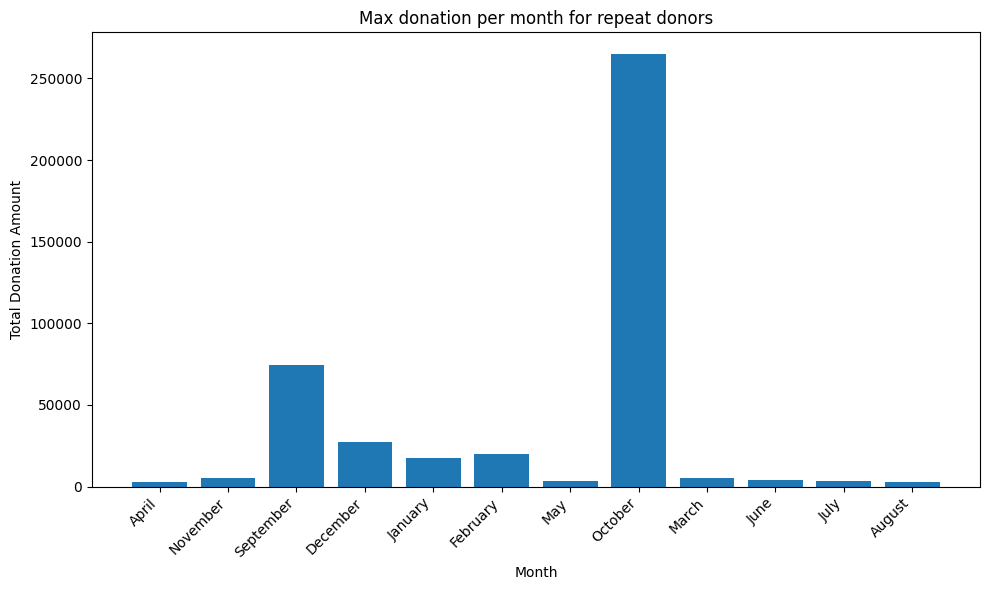

In [ ]:
# Find the month with the maximum donation for each donor and year
max_donation_month = monthly_donations.loc[monthly_donations.groupby(['Account ID', 'Year'])['Total_Donation_Amount'].idxmax()]

# Map month numbers to month names for better readability
max_donation_month['Month Name'] = pd.to_datetime(max_donation_month['Month'], format='%m').dt.month_name()

# Display the results
print(max_donation_month[['Account ID', 'Year', 'Month Name', 'Total_Donation_Amount']])



plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(max_donation_month['Month Name'], max_donation_month['Total_Donation_Amount'])
plt.xlabel("Month")
plt.ylabel("Total Donation Amount")
plt.title("Max donation per month for repeat donors")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

We see a peak of donations for repeat donors September and October

In [ ]:
# Apply first differencing
repeat_donators_22_24['Diff_Total_Donation_Amount'] = repeat_donators_22_24.groupby('Account ID')['Total_Donation_Amount'].diff()
# repeat_donators_22_24['Company'] = repeat_donators_22_24.groupby('Account ID')['Company'].diff()

# Drop missing values created by differencing
r2_2epeat_donators_24 = repeat_donators_22_24.dropna()

# Dependent and independent variables for regression
Y = repeat_donators_22_24['Diff_Total_Donation_Amount']
X = repeat_donators_22_24['Company']

# Add a constant to the independent variables
# X = sm.add_constant(X)

# Fit the first-difference regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())


# A - 2023: 100$(individual) --> 2024: 150$
# B - 2023: 100$(company) --> 2024: 181$

                                     OLS Regression Results                                    
Dep. Variable:     Diff_Total_Donation_Amount   R-squared (uncentered):                     nan
Model:                                    OLS   Adj. R-squared (uncentered):                nan
Method:                         Least Squares   F-statistic:                                nan
Date:                        Tue, 07 Jan 2025   Prob (F-statistic):                         nan
Time:                                23:41:43   Log-Likelihood:                             nan
No. Observations:                        1106   AIC:                                        nan
Df Residuals:                            1105   BIC:                                        nan
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

<ipython-input-57-70f11740f7d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_donators_22_24['Diff_Total_Donation_Amount'] = repeat_donators_22_24.groupby('Account ID')['Total_Donation_Amount'].diff()


In [ ]:


# Ensure all relevant columns are numeric
donations_by_month['Account ID'] = pd.to_numeric(donations_by_month['Account ID'], errors='coerce') # Convert 'Account ID' to numeric, handling errors
donations_by_month['Donation Amount'] = pd.to_numeric(donations_by_month['Donation Amount'], errors='coerce') # Convert 'Donation Amount' to numeric, handling errors


Y = donations_by_month['Donation Amount']
X = donations_by_month[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


NameError: name 'donations_by_month' is not defined

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming `repeat_donators_22_24` is a pandas DataFrame.

# Apply first differencing to 'Donation_Amount' and 'Donation_Month'
repeat_donators_22_24['Diff_Donation_Amount'] = repeat_donators_22_24.groupby('Account ID')['Total_Donation_Amount'].diff()
repeat_donators_22_24['Diff_Donation_Month'] = repeat_donators_22_24.groupby('Account ID')['Donation_Month'].diff()

# Drop missing values created by differencing
repeat_donators_22_24_cleaned = repeat_donators_22_24.dropna()

# Dependent and independent variables for regression
Y = repeat_donators_22_24_cleaned['Diff_Donation_Amount']
X = repeat_donators_22_24_cleaned['Diff_Donation_Month']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the first-difference regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())


NameError: name 'repeat_donators_22_24' is not defined

In [ ]:
repeat_donators_22_24.columns

AttributeError: 'Series' object has no attribute 'columns'